# 1장 우아한 넘파이 : 파이썬 과학 기초

In [3]:
import numpy as np

def rpkm(counts, lengths):
    """RPKM을 계산한다.
    RPKM = (10^9 * C) / (N * L)

    변수 :
    C = 유전자에 매핑된 판독 수
    N = 실험에서 매핑된 총 판독 수
    L = 유전자 염기쌍 엑손(Exon) 길이

    매개변수
    ----------
    counts: array, shape (N_genes, N_samples)
        RNA 염기서열분석 개수 (열 : 개별 샘플, 행 : 유전자)
    lengths: array, shape (N_genes,)
        유전자 행과 같은 순서로 된 염기쌍 유전자 길이

    반환값
    -------
    normed : array, shape (N_genes, N_samples)
        정규화된 RPKM 개수 행렬
    """
    N = np.sum(counts, axis=0)  # 각 열의 합계 (샘플 당 총 판독수)
    L = lengths
    C = counts

    normed = 1e9 * C / (N[np.newaxis, :] * L[:, np.newaxis])

    return(normed)

## 1.1 유전자 발현 데이터

In [4]:
gene0 = [100, 200]
gene1 = [50, 0]
gene2 = [350, 100]
expression_data = [gene0, gene1, gene2]
expression_data[2][0]

350

## 1.2 넘파이 N차원 배열

In [8]:
import numpy as np

array1d = np.array([1, 2, 3, 4])
print(array1d)
print(type(array1d))
print(array1d.shape)

[1 2 3 4]
<class 'numpy.ndarray'>
(4,)


In [10]:
array2d = np.array(expression_data)
print(array2d)
print(array2d.shape)
print(type(array2d))
print(array2d.ndim) 

[[100 200]
 [ 50   0]
 [350 100]]
(3, 2)
<class 'numpy.ndarray'>
2


### 1.2.1 왜 파이썬 리스트 대신 ndarray를 사용할까?

In [11]:
import numpy as np

# 정수 범위(0~999,999)의 ndarray 생성 
array = np.arange(1e6)
# 파이썬 리스트로 변환
list_array = array.tolist()

In [12]:
%timeit -n10 y = [val * 5 for val in list_array]

83.2 ms ± 2.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
%timeit -n10 x = array * 5

1.12 ms ± 310 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
# ndarray x 생성
x = np.array([1, 2, 3], np.int32)
print(x)

[1 2 3]


In [15]:
# 슬라이스 x 생성
y = x[:2]
print(y)

[1 2]


In [16]:
# y 첫 번째 요소에 6 할당
y[0] = 6
print(y)

[6 2]


In [17]:
# 이제 첫 번째 x 요소는 6으로 바뀌었다.
print(x)


[6 2 3]


In [18]:
y = np.copy(x[:2])

### 1.2.2 벡터화

In [19]:
x = np.array([1, 2, 3, 4])
print(x * 2)

[2 4 6 8]


In [20]:
y = np.array([0, 1, 2, 1])
print(x + y)

[1 3 5 5]


### 1.2.3 브로드캐스팅

In [23]:
x = np.array([1, 2, 3, 4])
x = np.reshape(x, (len(x), 1))
print(x)

[[1]
 [2]
 [3]
 [4]]


In [24]:
y = np.array([0, 1, 2, 1])
y = np.reshape(y, (1, len(y)))
print(y)

[[0 1 2 1]]


In [25]:
print(x.shape)
print(y.shape)

(4, 1)
(1, 4)


In [26]:
outer = x * y
print(outer)

[[0 1 2 1]
 [0 2 4 2]
 [0 3 6 3]
 [0 4 8 4]]


In [27]:
print(outer.shape)

(4, 4)


## 1.3 유전자 발현 데이터셋
### 1.3.1 팬더스로 데이터 읽기

In [4]:
import numpy as np
import pandas as pd

# TCGA 흑색종(melanoma) 데이터 불러오기
filename = 'data/counts.txt'
with open(filename, 'rt') as f:
    data_table = pd.read_csv(f, index_col=0) # 팬더스로 파일 파싱

print(data_table.iloc[:5, :5])

       00624286-41dd-476f-a63b-d2a5f484bb45  TCGA-FS-A1Z0  TCGA-D9-A3Z1  \
A1BG                                1272.36        452.96        288.06   
A1CF                                   0.00          0.00          0.00   
A2BP1                                  0.00          0.00          0.00   
A2LD1                                164.38        552.43        201.83   
A2ML1                                 27.00          0.00          0.00   

       02c76d24-f1d2-4029-95b4-8be3bda8fdbe  TCGA-EB-A51B  
A1BG                                 400.11        420.46  
A1CF                                   1.00          0.00  
A2BP1                                  0.00          1.00  
A2LD1                                165.12         95.75  
A2ML1                                  0.00          8.00  


In [6]:
# 샘플 이름
samples = list(data_table.columns)

with open('data/genes.csv', 'rt') as f:
    # 팬더스 파일 파싱 및 GeneSymbol 인덱싱
    gene_info = pd.read_csv(f, index_col=0)
print(gene_info.iloc[:5, :])

            GeneID  GeneLength
GeneSymbol                    
CPA1          1357        1724
GUCY2D        3000        3623
UBC           7316        2687
C11orf95     65998        5581
ANKMY2       57037        2611


In [7]:
print("data_table 유전자 : ", data_table.shape[0])
print("gene_info 유전자 : ", gene_info.shape[0])

data_table 유전자 :  20500
gene_info 유전자 :  20503


In [8]:
matched_index = pd.Index.intersection(data_table.index, gene_info.index)

# 각 개체의 각 유전자에 대한 발현 개수를 포함하는 2차원 ndarray 
counts = np.asarray(data_table.loc[matched_index], dtype=int)

gene_names = np.array(matched_index)

# 유전자수와 개체수 확인
print(f'{counts.shape[1]}개의 개체에 {counts.shape[0]}개의 유전자 측정됨')

375개의 개체에 20500개의 유전자 측정됨


In [9]:
# 각 유전자 길이를 포함한 1차원 ndarray
gene_lengths = np.asarray(gene_info.loc[matched_index]['GeneLength'], dtype=int)

print(counts.shape)
print(gene_lengths.shape)

(20500, 375)
(20500,)


## 1.4 정규화
### 1.4.1 샘플 간 비교

In [21]:
# 주피터 노트북에서 모든 그래프를 일렬로 표시
%matplotlib inline
# 그래프 스타일 파일
import matplotlib.pyplot as plt
plt.style.use('style/elegant.mplstyle')

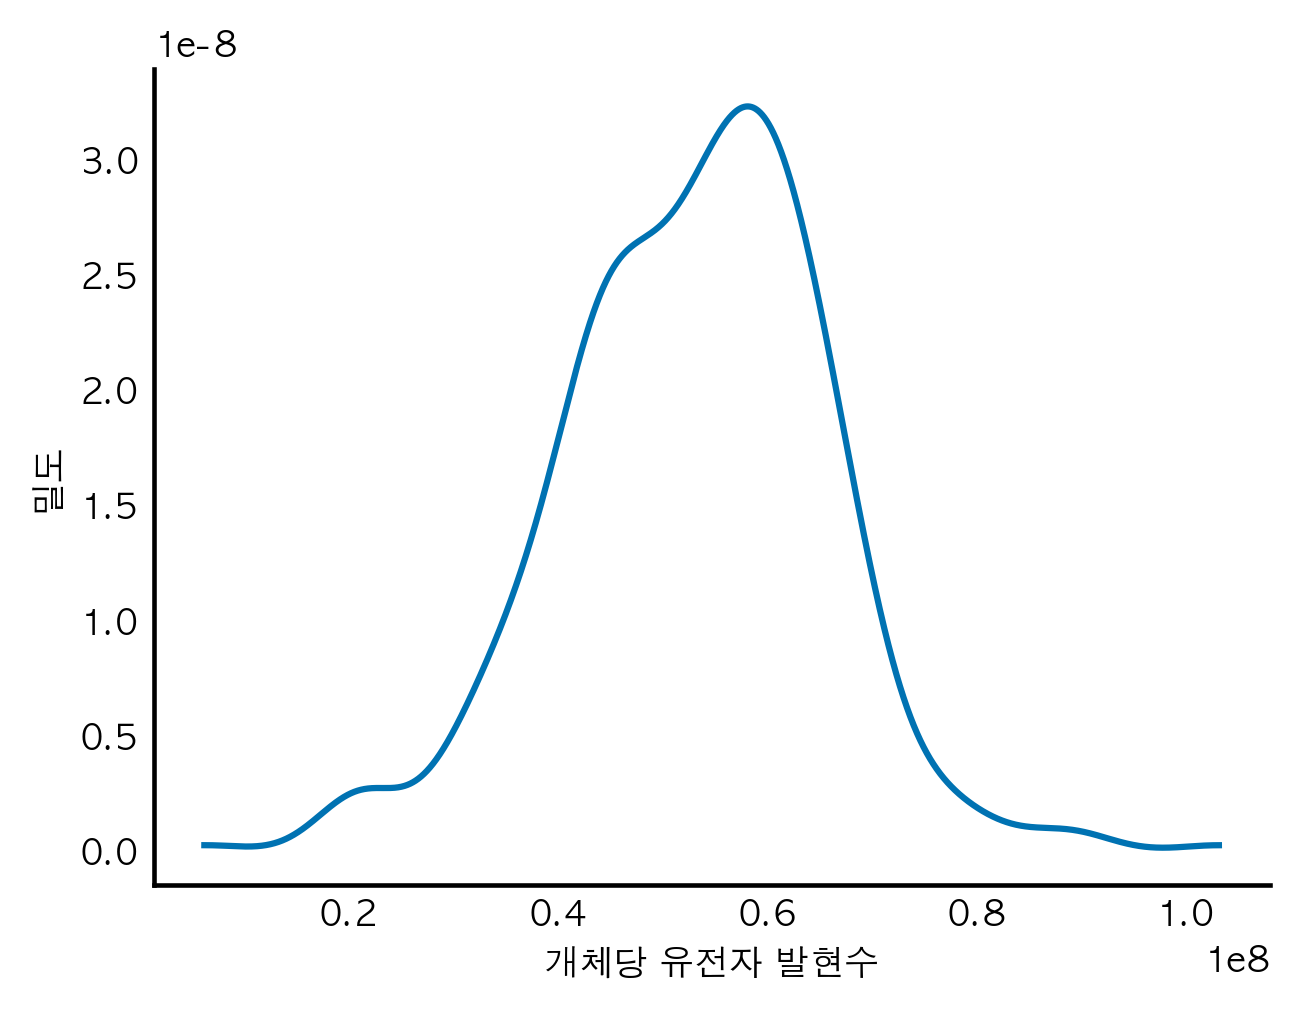

개수 통계 :
  최소값 :  6231205
  평균 : 52995255.33866667
  최대값 :  103219262


In [58]:
total_counts = np.sum(counts, axis=0)  # 열 합계
                                       # (axis=1 행 합계)

from scipy import stats
# 밀도 추정을 매끄럽게 하기 위한 정규분포
density = stats.kde.gaussian_kde(total_counts)
# Make values for which to estimate the density, for plotting
x = np.arange(min(total_counts), max(total_counts), 10000)
# 밀도 그래프 생성
fig, ax = plt.subplots()
ax.plot(x, density(x))
ax.set_xlabel("개체당 유전자 발현수")
ax.set_ylabel("밀도")

plt.show()

print(f'개수 통계 :\n  최소값 :  {np.min(total_counts)}'
      f'\n  평균 : {np.mean(total_counts)}'
      f'\n  최대값 :  {np.max(total_counts)}')

### 1.4.2 샘플 간 공간(library) 크기 정규화

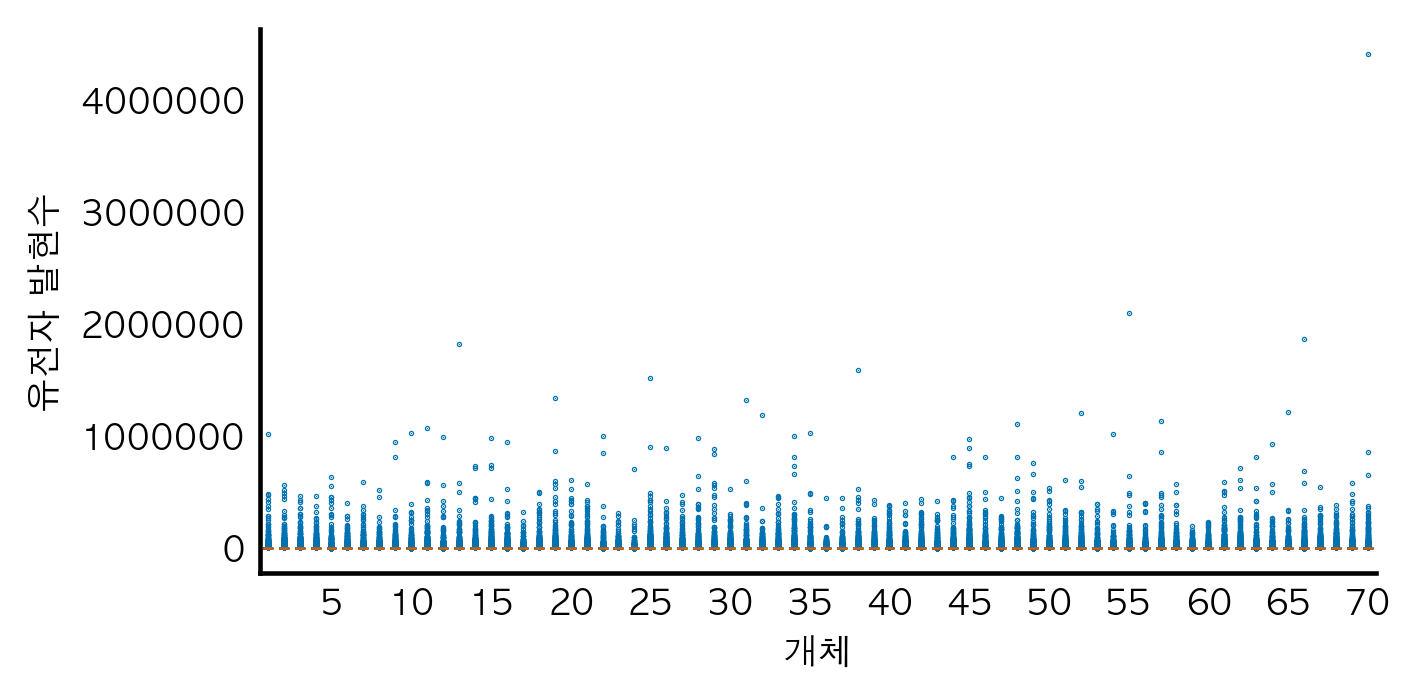

In [22]:
# 그래프를 위한 하위 데이터
np.random.seed(seed=7) # 일관된 결과를 얻기 위해서 seed를 설정한다.
# 무작위로 샘플 70개를 선택한다.
samples_index = np.random.choice(range(counts.shape[1]), size=70, replace=False)
counts_subset = counts[:, samples_index]

# 그래프를 읽기 쉽게 만들기 위한 사용자 정의 x축 레이블
def reduce_xaxis_labels(ax, factor):
    """ x축에 밀집되지 않도록 모든 i번째 레이블만 표시한다.
        예) factor = 2는 초당 x축 레이블을 그릴 때, 2부터 시작한다.

    매개변수
    ----------
    ax : 조정할 matplotlib 그래프 축
    factor : x축 레이블 수를 줄이기 위한 정수
    """
    plt.setp(ax.xaxis.get_ticklabels(), visible=False)
    for label in ax.xaxis.get_ticklabels()[factor-1::factor]:
        label.set_visible(True)

# 개체별 발현 개수 막대 그래프
fig, ax = plt.subplots(figsize=(4.8, 2.4))

with plt.style.context('style/thinner.mplstyle'):
    ax.boxplot(counts_subset)
    ax.set_xlabel("개체")
    ax.set_ylabel("유전자 발현수")
    reduce_xaxis_labels(ax, 5)

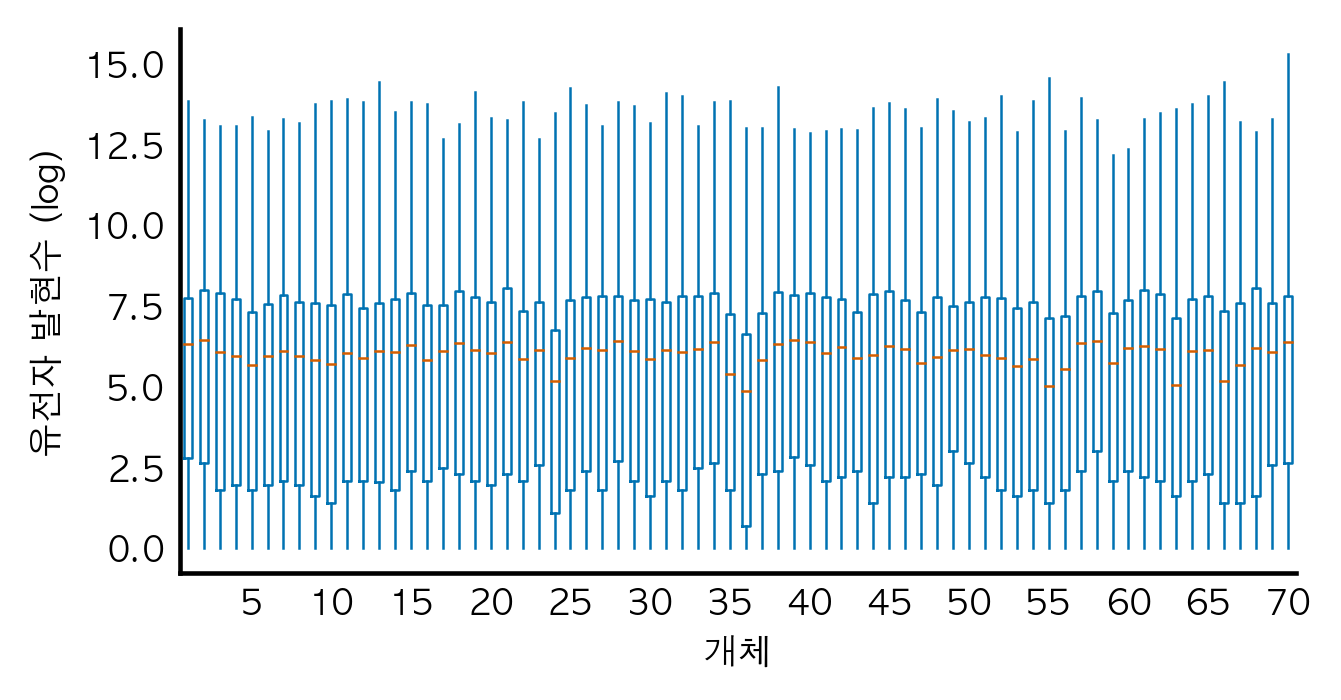

In [23]:
# 개체별 유전자 발현 수 막대 그래프
fig, ax = plt.subplots(figsize=(4.8, 2.4))
with plt.style.context('style/thinner.mplstyle'):
    ax.boxplot(np.log(counts_subset + 1))
    ax.set_xlabel("개체")
    ax.set_ylabel("유전자 발현수 (log)")
    reduce_xaxis_labels(ax, 5)

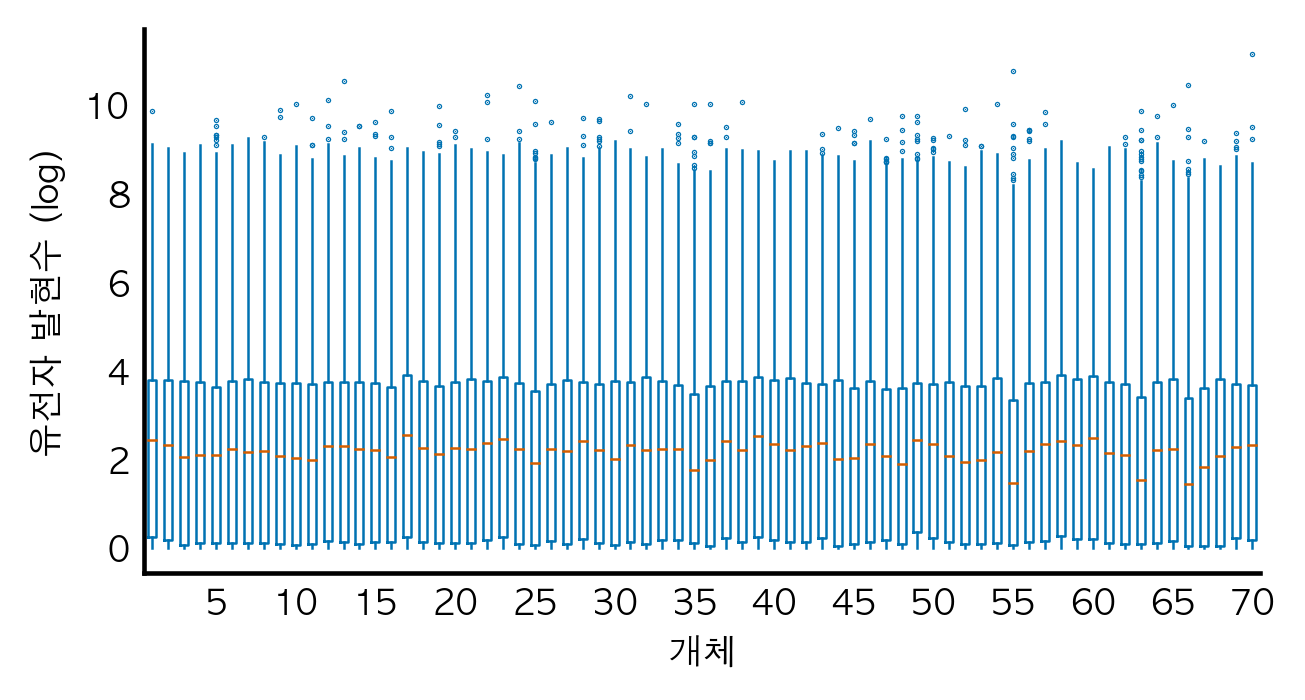

In [60]:
# 개체 공간 크기에 의한 정규화
# 유전자 발현 수를 해당 개체의 총 유전자수로 나눈다.
# 1000000을 곱하면 유사한 척도를 얻을 수 있다.
counts_lib_norm = counts / total_counts * 1000000
# 브로드캐스팅을 두 번 사용했다.
counts_subset_lib_norm = counts_lib_norm[:,samples_index]
# 개체별 유전자 발현 수 막대 그래프
fig, ax = plt.subplots(figsize=(4.8, 2.4))
with plt.style.context('style/thinner.mplstyle'):
    ax.boxplot(np.log(counts_subset_lib_norm + 1))
    ax.set_xlabel("개체")
    ax.set_ylabel("유전자 발현수 (log)")
    reduce_xaxis_labels(ax, 5)

In [29]:
import itertools as it
from collections import defaultdict

def class_boxplot(data, classes, colors=None, **kwargs):
    """ 클래스(classes)에 따라 색깔 막대 그래프 생성한다.

    매개변수
    ----------
    data : 부동 소수점 배열 리스트
        data 각 요소에 대한 하나의 그래프 막대가 생성된다.
    classes : 문자열 리스트, data와 같은 길이
        data가 속한 각 분포의 클래스

    다른 매개변수
    ----------------
    kwargs : 딕셔너리
        plt.boxplot에 전달하는 키워드 인수
    """
    all_classes = sorted(set(classes))
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    class2color = dict(zip(all_classes, it.cycle(colors)))

    # 클래스를 데이터 백터에 매핑
    # 오프셋을 위해서 그 외의 클래스에 빈 리스트를 추가한다.
    class2data = defaultdict(list)
    for distrib, cls in zip(data, classes):
        for c in all_classes:
            class2data[c].append([])
        class2data[cls][-1] = distrib

    # 차례대로 각 그래프 막대에 적절한 색을 입힌다.
    fig, ax = plt.subplots()
    lines = []
    for cls in all_classes:
        # 막대 그래프의 모든 요소에 색을 설정한다.
        for key in ['boxprops', 'whiskerprops', 'flierprops']:
            kwargs.setdefault(key, {}).update(color=class2color[cls])
        # 막대 그래프를 그린다.
        box = ax.boxplot(class2data[cls], **kwargs)
        lines.append(box['whiskers'][0])
    ax.legend(lines, all_classes)
    return ax

/Users/achoi/miniconda3/envs/elegant-scipy/lib/python3.6/site-packages/matplotlib/transforms.py:661: RuntimeWarning: invalid value encountered in absolute
  inside = ((abs(dx0 + dx1) + abs(dy0 + dy1)) == 0)


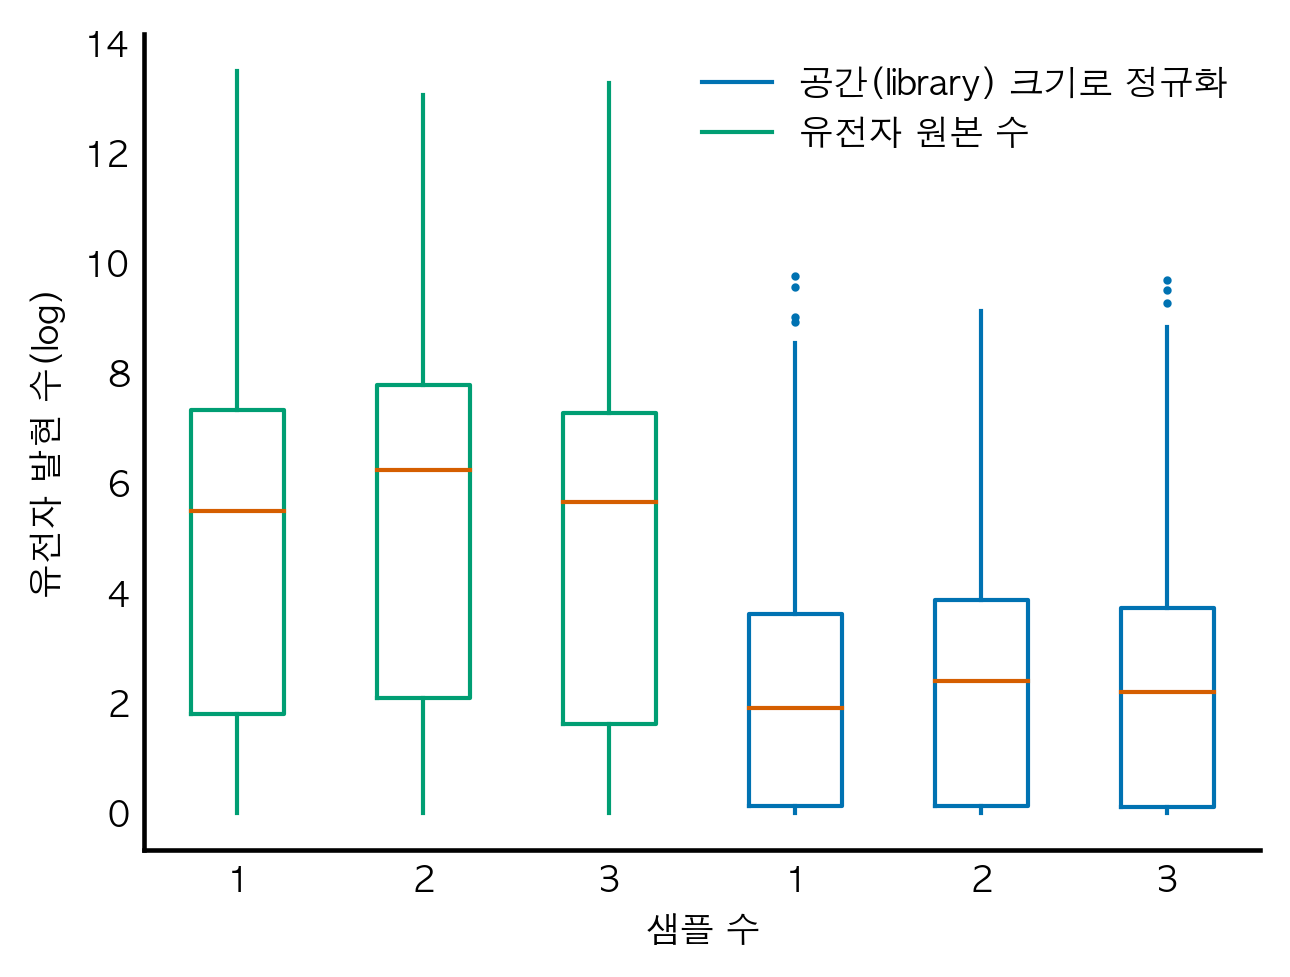

In [65]:
log_counts_3 = list(np.log(counts.T[:3] + 1))
log_ncounts_3 = list(np.log(counts_lib_norm.T[:3] + 1))
ax = class_boxplot(log_counts_3 + log_ncounts_3,
                   ['유전자 원본 수'] * 3 + ['공간(library) 크기로 정규화'] * 3,
                   labels=[1, 2, 3, 1, 2, 3])
ax.set_xlabel('샘플 수')
ax.set_ylabel('유전자 발현 수(log)');

# ['raw counts'] * 3 + ['normalized by library size'] * 3 # <= 영어로 사용하면 경고가 안뜬다.

### 1.4.3 유전자 간 비교

In [25]:
def binned_boxplot(x, y, *,  # 코드 아래의 파이썬 3 팁을 참고한다.
                       xlabel='유전자 길이(log)',
                       ylabel='유전자 개수(log) 평균'):
    """그래프 막대로 ‘x’에 의존하는 ‘y’ 분포를 그린다.

    참고: 모든 입력 단위는 log 값이다.

    매개변수
    ----------
    x: 부동 소수점의 1차원 배열
        독립변수
    y: 부동 소수점의 1차원 배열
        종속변수
    """
    # 관측 밀도에 따른 ‘x’의 막대 그래프 간격(bin)을 정의한다.
    x_hist, x_bins = np.histogram(x, bins='auto')
    
    # bins에 번호를 매기기 위해서 np.digitize()를 사용한다.
    # 최대 관측치를 조절하기 위해서 bins 마지막 값을 버린다.
    x_bin_idxs = np.digitize(x, x_bins[:-1])

    # 인덱스로 각 배열에 ‘y’를 포함하는 리스트를 만든다.
    # 그래프 간격의 ‘x’에 해당하는 값을 사용한다.
    binned_y = [y[x_bin_idxs == i]
                for i in range(np.max(x_bin_idxs))]
    fig, ax = plt.subplots(figsize=(4.8,1))

    # 그래프 간격 중심으로 x축의 레이블을 만든다.
    x_bin_centers = (x_bins[1:] + x_bins[:-1]) / 2
    x_ticklabels = np.round(np.exp(x_bin_centers)).astype(int)
    # 막대 그래프를 만든다.
    ax.boxplot(binned_y, labels=x_ticklabels)

    # x축에서 레이블이 겹치는 것을 피하기 위해서 열 번째마다 레이블을 표시한다.
    reduce_xaxis_labels(ax, 10)

    # x, y축 이름을 설정한다.
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

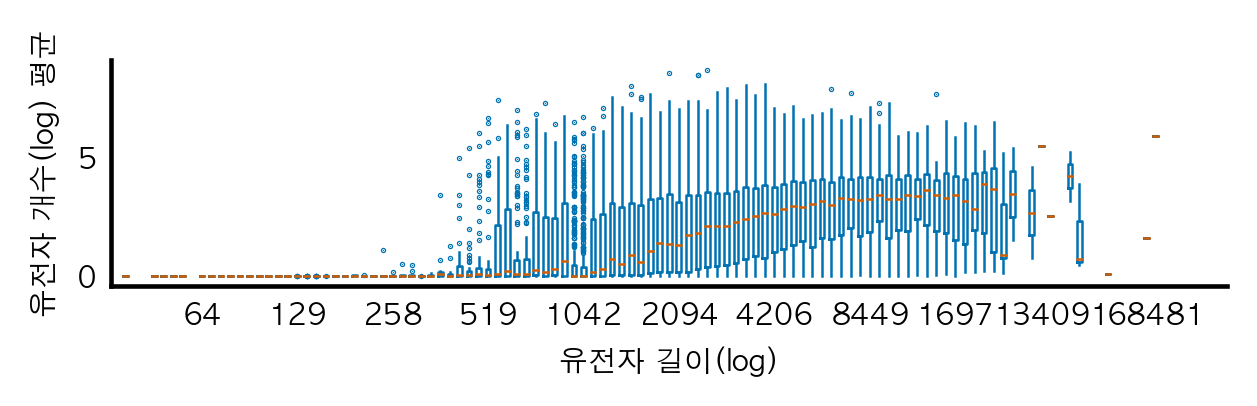

In [75]:
log_counts = np.log(counts_lib_norm + 1)
mean_log_counts = np.mean(log_counts, axis=1)  # 샘플 간 평균
log_gene_lengths = np.log(gene_lengths)
with plt.style.context('style/thinner.mplstyle'):
    binned_boxplot(x=log_gene_lengths, y=mean_log_counts)

### 1.4.4 샘플과 유전자의 정규화 : RPKM

In [12]:
# 변수 이름은 RPKM 식과 같다.
C = counts
N = counts.sum(axis=0)  # (각 열을 합한) 샘플당 총 유전자 수
L = gene_lengths  # 각 유전자의 길이, C의 크기와 같다.

# C의 모든 요소에 10^9을 곱한다.
C_tmp = 10^9 * C
print('C_tmp.shape', C_tmp.shape)
print('L.shape', L.shape)

C_tmp.shape (20500, 375)
L.shape (20500,)


In [13]:
L = L[:, np.newaxis] # L 모양 뒤에 1을 추가한다.
print('C_tmp.shape', C_tmp.shape)
print('L.shape', L.shape)

C_tmp.shape (20500, 375)
L.shape (20500, 1)


In [14]:
# 해당 유전자 길이(L)로 각 행을 나눈다.
C_tmp = C_tmp / L

N = counts.sum(axis=0) # (각 열을 합한) 샘플당 총 유전자 수

# C_tmp와 N 모양 확인
print('C_tmp.shape', C_tmp.shape)
print('N.shape', N.shape)

C_tmp.shape (20500, 375)
N.shape (375,)


In [16]:
# 가독성을 위해서 N 모양 앞에 1을 추가한다.
N = N[np.newaxis, :]
print('C_tmp.shape', C_tmp.shape)
print('N.shape', N.shape)

# 각 열을 해당 열의 총 수로 나눈다 (N)
rpkm_counts = C_tmp / N

C_tmp.shape (20500, 375)
N.shape (1, 1, 375)


In [17]:
def rpkm(counts, lengths):
    """RPKM을 계산한다.
    RPKM = (10^9 * C) / (N * L)

    변수 :
    C = 유전자에 매핑된 판독 수
    N = 실험에서 매핑된 총 판독 수
    L = 유전자 염기쌍 엑손(Exon) 길이

    매개변수
    ----------
    counts: array, shape (N_genes, N_samples)
        RNA 염기서열분석 개수 (열 : 개별 샘플, 행 : 유전자)
    lengths: array, shape (N_genes,)
        유전자 행과 같은 순서로 된 염기쌍 유전자 길이

    반환값
    -------
    normed : array, shape (N_genes, N_samples)
        정규화된 RPKM 개수 행렬
    """
    N = np.sum(counts, axis=0)  # 각 열의 합계 (샘플 당 총판독 수)
    L = lengths
    C = counts

    normed = 1e9 * C / (N[np.newaxis, :] * L[:, np.newaxis])

    return(normed)

counts_rpkm = rpkm(counts, gene_lengths)

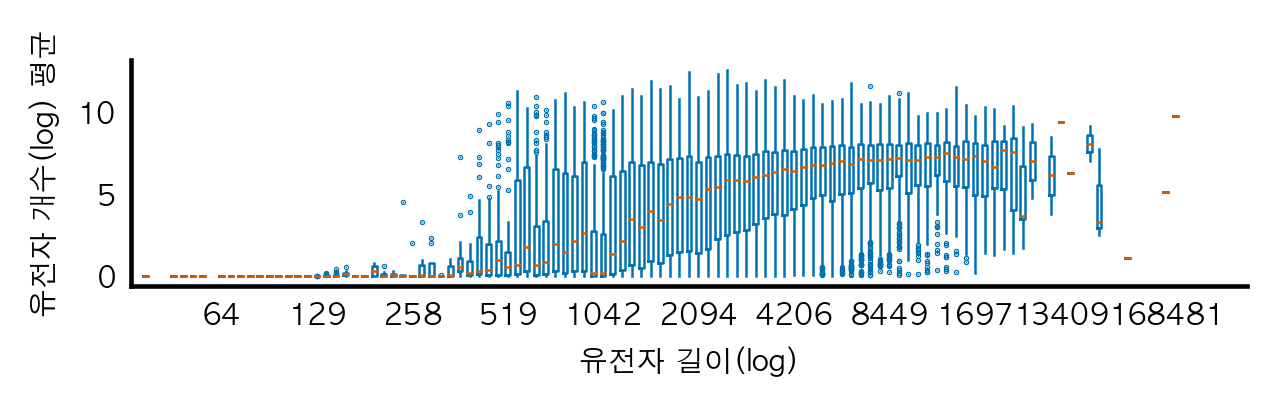

In [26]:
log_counts = np.log(counts + 1)
mean_log_counts = np.mean(log_counts, axis=1)
log_gene_lengths = np.log(gene_lengths)

with plt.style.context('style/thinner.mplstyle'):
    binned_boxplot(x=log_gene_lengths, y=mean_log_counts)

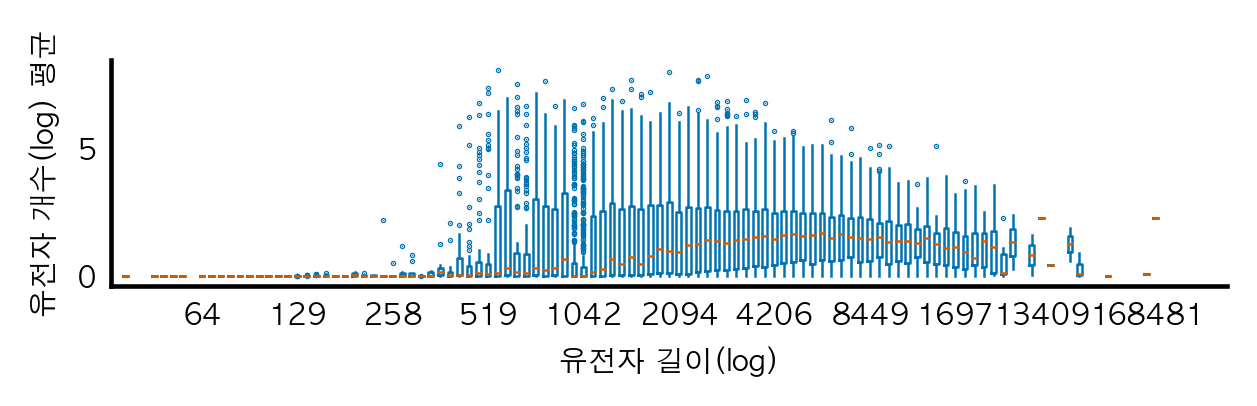

In [27]:
log_counts = np.log(counts_rpkm + 1)
mean_log_counts = np.mean(log_counts, axis=1)
log_gene_lengths = np.log(gene_lengths)
with plt.style.context('style/thinner.mplstyle'):
    binned_boxplot(x=log_gene_lengths, y=mean_log_counts)


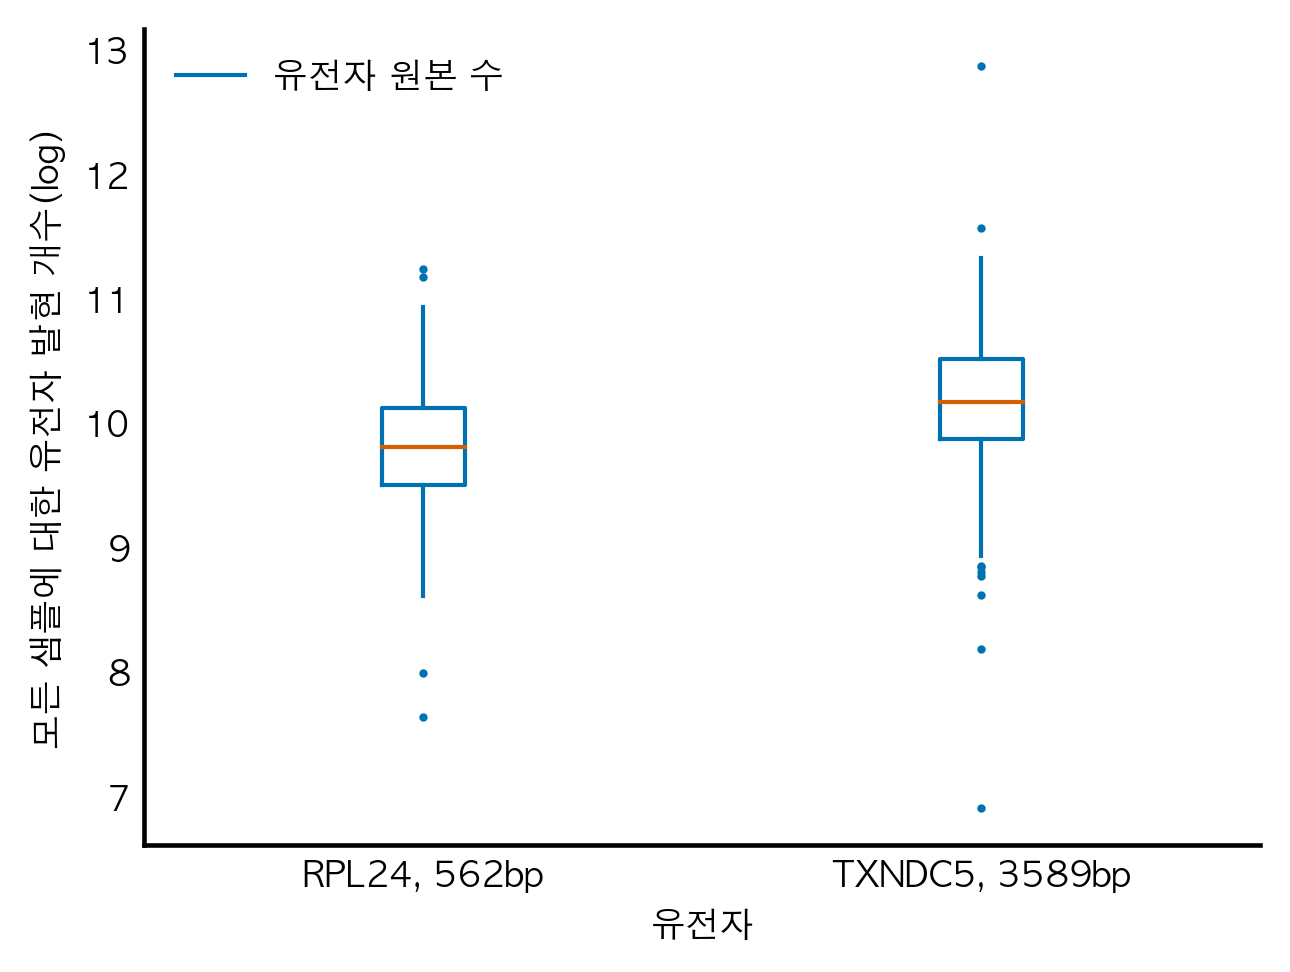

In [30]:
gene_idxs = np.array([80, 186])
gene1, gene2 = gene_names[gene_idxs]
len1, len2 = gene_lengths[gene_idxs]
gene_labels = [f'{gene1}, {len1}bp', f'{gene2}, {len2}bp']

log_counts = list(np.log(counts[gene_idxs] + 1))
log_ncounts = list(np.log(counts_rpkm[gene_idxs] + 1))


ax = class_boxplot(log_counts,
                   ['유전자 원본 수'] * 3,
                   labels=gene_labels)
ax.set_xlabel('유전자')
ax.set_ylabel('모든 샘플에 대한 유전자 발현 개수(log)');

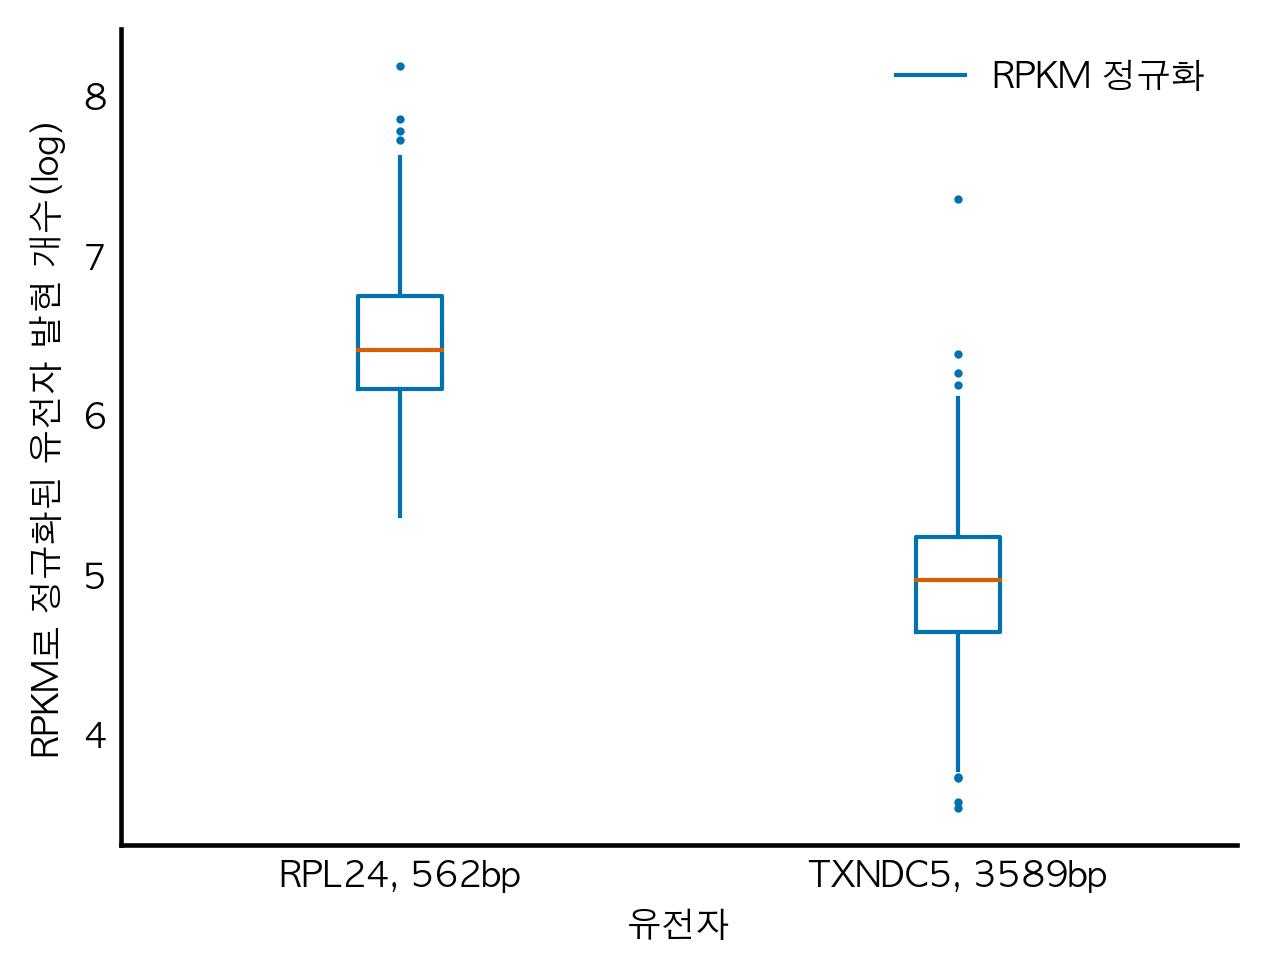

In [32]:
ax = class_boxplot(log_ncounts,
                   ['RPKM 정규화'] * 3,
                   labels=gene_labels)
ax.set_xlabel('유전자')
ax.set_ylabel('RPKM로 정규화된 유전자 발현 개수(log)');